ANN Clasificatoria con dataset dataset_186_satimage

In [19]:
# Funciones para el procesamiento de los datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()

In [20]:
data_origin = pd.read_csv(r'../3_Normalización/datasets/dataset_186_satimage.csv')
dataset = fit_cols(data_origin, data_origin.columns, Min_Max)
dataset = one_hot_cols(dataset, ['class'])
# dataset.head(20)
# dataset.describe()

In [21]:
X_train, X_test, Y_train, Y_test = split_Dataset(dataset, list(dataset.columns)[-6:])
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))

(5144, 36) (5144, 6)
(1286, 36) (1286, 6)


In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop



def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

np.random.seed(7)



Adam=optimizers.Adam(lr=0.05)
Sgd=optimizers.SGD(lr=0.01)

In [27]:
def Model1():
    model = Sequential()
    model.add(Dense(20,input_dim=36,activation='relu'))
    model.add(Dense(15,activation='relu'))
    
    
    model.add(Dense(6,activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model



M=Model1()

Epoch 1/30
1029/1029 [==============================] - 3s 3ms/step - loss: 0.9852 - accuracy: 0.6398 - val_loss: 0.6756 - val_accuracy: 0.7815
Epoch 2/30
1029/1029 [==============================] - 3s 3ms/step - loss: 0.5762 - accuracy: 0.8029 - val_loss: 0.4834 - val_accuracy: 0.8297
Epoch 3/30
1029/1029 [==============================] - 2s 2ms/step - loss: 0.4785 - accuracy: 0.8167 - val_loss: 0.4604 - val_accuracy: 0.8165
Epoch 4/30
1029/1029 [==============================] - 2s 2ms/step - loss: 0.4368 - accuracy: 0.8239 - val_loss: 0.3974 - val_accuracy: 0.8453
Epoch 5/30
1029/1029 [==============================] - 2s 2ms/step - loss: 0.4130 - accuracy: 0.8348 - val_loss: 0.3754 - val_accuracy: 0.8484
Epoch 6/30
1029/1029 [==============================] - 2s 2ms/step - loss: 0.3977 - accuracy: 0.8453 - val_loss: 0.3860 - val_accuracy: 0.8523
Epoch 7/30
1029/1029 [==============================] - 2s 2ms/step - loss: 0.3839 - accuracy: 0.8460 - val_loss: 0.3983 - val_accuracy:

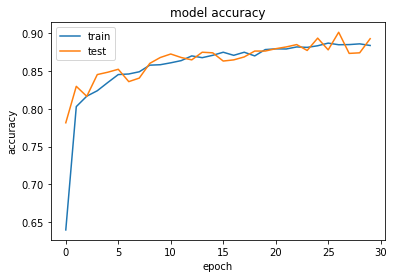

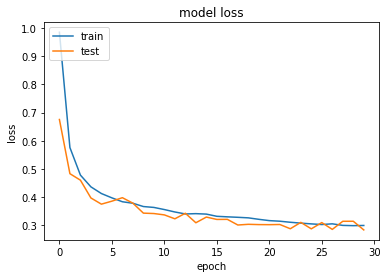

In [28]:
History=M.fit(X_train,Y_train,
              epochs=30,
              batch_size=5,
              validation_data=(X_test,Y_test))

Show_History(History)